# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

Business problem
The interest in a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely. Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. This project involves solving a real-world business problem of sales forecasting and building up a machine learning model for the same.

Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.

Approach Business Problem Data Collection and Preprocessing

 * Importing important libraries and modules
 * Data Cleaning
 * Missing Data Handling
 * Merging the Datasets
 * Exploratory Data Analysis

Hypotheses
  * Categorical Features
  * Continuous Features
  * EDA Conclusion and Validating Hypotheses

Feature Selection and Outlier Detection

  * Feature Engineering
  * Outlier Detection and Treatment

Modeling

  * Train Test Split
  * Baseline Model - Decision Tree
  * Random Forest Model
  * Random Forest Hyperparameter Tuning
  * Random Forest Feature Importance

Model Performance and Evaluation

  * Visualizing Model Performances
  * Random Forest vs Baseline Model
  * Random Forest Tuned vs Baseline and Random Forest Models

Store wise Sales Predictions Conclusion and Recommendations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

rosssales_dfpath='/content/drive/My Drive/Almabetter projects/Sales prediction/Rossmann Stores Data.csv'



In [5]:
rosstorepath='/content/drive/My Drive/Almabetter projects/Sales prediction/store.csv'


In [6]:
rsales_df=pd.read_csv(rosssales_dfpath)

In [7]:
rstore_df=pd.read_csv(rosstorepath)

## **Exploratory Data Analysis**

In [8]:
rsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
rsales_df.shape

(1017209, 9)

In [12]:
rsales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [14]:
rstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [15]:
rstore_df.shape

(1115, 10)

In [17]:
rstore_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
#Checking for NaN Values
rsales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

No Nan caluses are present in rsales_df.csv

In [19]:
rstore_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## **Handling Missing Data**
Out of 1115 entries these are missing values for the columns:

**CompetitionDistance**- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

**CompetitionOpenSinceMonth**- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

**CompetitionOpenSinceYear**- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

Text(0.5, 0, 'Competition Distance Distribution Plot')

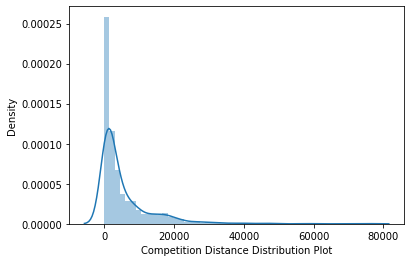

In [20]:
# distribution plot of competition distance
sns.distplot(x=rstore_df['CompetitionDistance'],hist=True)
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. As data is prone to outlier, We replace NaN values with Median as it is more robust to outlier effect.

In [21]:
# Replacing NaN competition distance values with the median value
rstore_df['CompetitionDistance'].fillna(rstore_df['CompetitionDistance'].median(), inplace = True)

In [22]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
rstore_df['CompetitionOpenSinceMonth'].fillna(rstore_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
rstore_df['CompetitionOpenSinceYear'].fillna(rstore_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [23]:
# imputing the nan values of promo2 related columns with 0
rstore_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
rstore_df['Promo2SinceYear'].fillna(value=0,inplace=True)
rstore_df['PromoInterval'].fillna(value=0,inplace=True)

In [24]:
#check
rstore_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Now, the stores dataset is perfectly alright without NaN values



In [25]:
# Now merge the datasets on stores data
rdf = rsales_df.merge(right=rstore_df, on="Store", how="left")

In [26]:
# look of first five rows pf merged data
rdf.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [27]:
# shape of Merged data
rdf.shape

(1017209, 18)

In [28]:
rdf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO